In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [110]:
df = pd.read_csv('voice.csv')

In [111]:
df.head()

,meanfreq,sd,...,modindx,label
0,NaN,0.064241,...,0.000000,male
1,0.066009,0.067310,...,0.052632,male
2,0.077316,0.083829,...,0.046512,male
3,0.151228,0.072111,...,0.247119,male
4,0.135120,0.079146,...,0.208274,male


In [112]:
for j in df.head():
    print(j)

meanfreq
sd
median
Q25
Q75
IQR
skew
kurt
sp.ent
sfm
mode
centroid
meanfun
minfun
maxfun
meandom
mindom
maxdom
dfrange
modindx
label


In [104]:
print(df.IQR)

0       0.075122
1       0.073252
2       0.123207
3       0.111374
4       0.127325
          ...   
3163    0.151859
3164    0.162193
3165    0.190936
3166    0.176435
3167    0.180756
Name: IQR, Length: 3168, dtype: float64


In [91]:
#check null values
df.isnull().sum()

meanfreq    1
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [94]:
pd.set_option('display.max_columns', 4)
df.head()

,meanfreq,sd,...,modindx,label
0,NaN,0.064241,...,0.000000,male
1,0.066009,0.067310,...,0.052632,male
2,0.077316,0.083829,...,0.046512,male
3,0.151228,0.072111,...,0.247119,male
4,0.135120,0.079146,...,0.208274,male


In [7]:
def unique(col):
   return df[col].nunique()

In [8]:
d = {}
for i in df.columns:
    value = unique(i)
    d[i] = value
print(d,sep="\n")

{'meanfreq': 3166, 'sd': 3166, 'median': 3077, 'Q25': 3103, 'Q75': 3034, 'IQR': 3073, 'skew': 3166, 'kurt': 3166, 'sp.ent': 3166, 'sfm': 3166, 'mode': 2825, 'centroid': 3166, 'meanfun': 3166, 'minfun': 913, 'maxfun': 123, 'meandom': 2999, 'mindom': 77, 'maxdom': 1054, 'dfrange': 1091, 'modindx': 3079, 'label': 2}


In [9]:
x = df.iloc[:,:-1]
y = df.label

In [102]:
x.head(IQR)

NameError: name 'IQR' is not defined

In [11]:
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

In [12]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [13]:
data = ['Female','Male']
d= [1584,1584]

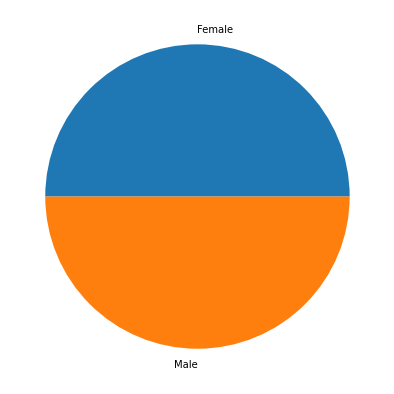

In [14]:
fig = plt.figure(figsize =(10, 7))
plt.pie(d, labels = data)
 
# show plot
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
#split dataset into training and test with test size as 20 percent

In [17]:
###1) Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
DTmodel = DecisionTreeClassifier(random_state = 1)
DTmodel.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [20]:
y_pred1 = DTmodel.predict(x_test)
y_pred1 = np.array(y_pred1)

In [21]:
print(y_pred1[:10])

['male' 'male' 'female' 'female' 'male' 'female' 'male' 'female' 'male'
 'female']


In [22]:
print('score of decision tree model is: ', DTmodel.score(x_test,y_test))

score of decision tree model is:  0.9605678233438486


In [23]:
from sklearn.metrics import classification_report,accuracy_score

In [24]:
pd.crosstab(y_pred1,y_test,rownames=['matrix'],colnames=['confusion'],margins = True)

confusion,female,male,All
matrix,,,
female,297,13,310
male,12,312,324
All,309,325,634


In [25]:
print("\t\t\tDecision Tree Class report:\n",classification_report(y_pred1,y_test))

			Decision Tree Class report:
               precision    recall  f1-score   support

      female       0.96      0.96      0.96       310
        male       0.96      0.96      0.96       324

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



In [26]:
print("Decision Tree Accuracy score: ",accuracy_score(y_pred1,y_test)*100,"%")

Decision Tree Accuracy score:  96.05678233438486 %


In [27]:
###2) Random Forest 

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
RFmodel = RandomForestClassifier(random_state = 200)

In [30]:
RFmodel.fit(x_train,y_train)

RandomForestClassifier(random_state=200)

In [31]:
y_pred2 = RFmodel.predict(x_test)

In [32]:
print(y_pred2[:10])

['male' 'male' 'female' 'female' 'male' 'female' 'male' 'female' 'male'
 'female']


In [33]:
print('score of Random forest model is: ',RFmodel.score(x_test,y_test))

score of Random forest model is:  0.9684542586750788


In [34]:
pd.crosstab(y_pred2,y_test,rownames=['matrix'],colnames=['confusion'],margins = True)

confusion,female,male,All
matrix,,,
female,302,13,315
male,7,312,319
All,309,325,634


In [35]:
print("\t\t\tRandom Forest Class report:\n",classification_report(y_pred2,y_test))

			Random Forest Class report:
               precision    recall  f1-score   support

      female       0.98      0.96      0.97       315
        male       0.96      0.98      0.97       319

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [36]:
print("Random Forest Accuracy score: ",accuracy_score(y_pred2,y_test)*100,"%")

Random Forest Accuracy score:  96.84542586750788 %


In [37]:
###3)Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
LRmodel = LogisticRegression(max_iter=10000)

In [40]:
LRmodel.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [41]:
y_pred3 = LRmodel.predict(x_test)

In [42]:
print(y_pred3[:10])

['male' 'male' 'female' 'female' 'male' 'female' 'male' 'female' 'male'
 'female']


In [43]:
print('score of Log Reg model is: ',LRmodel.score(x_test,y_test))

score of Log Reg model is:  0.9148264984227129


In [44]:
pd.crosstab(y_pred3,y_test,rownames=['matrix'],colnames=['confusion'],margins = True)

confusion,female,male,All
matrix,,,
female,267,12,279
male,42,313,355
All,309,325,634


In [45]:
print("\t\t\tLog Reg Class report:\n",classification_report(y_pred2,y_test))

			Log Reg Class report:
               precision    recall  f1-score   support

      female       0.98      0.96      0.97       315
        male       0.96      0.98      0.97       319

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [46]:
print("Log Reg Accuracy score: ",accuracy_score(y_pred3,y_test)*100,"%")

Log Reg Accuracy score:  91.48264984227129 %


In [47]:
###4) KNN Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
KNmodel = KNeighborsClassifier(n_neighbors =15, metric = 'minkowski', p = 1)
KNmodel.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=15, p=1)

In [49]:
y_pred4 = KNmodel.predict(x_test)

In [50]:
y_pred4[:10]

array(['male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male'], dtype=object)

In [51]:
print('score of KNN model is: ', KNmodel.score(x_test,y_test))

score of KNN model is:  0.7854889589905363


In [52]:
pd.crosstab(y_pred4,y_test,rownames=['matrix'],colnames=['confusion'],margins = True)

confusion,female,male,All
matrix,,,
female,231,58,289
male,78,267,345
All,309,325,634


In [53]:
print("\t\t\tKNN report:\n",classification_report(y_pred4,y_test))

			KNN report:
               precision    recall  f1-score   support

      female       0.75      0.80      0.77       289
        male       0.82      0.77      0.80       345

    accuracy                           0.79       634
   macro avg       0.78      0.79      0.78       634
weighted avg       0.79      0.79      0.79       634



In [54]:
print("KNN Accuracy score: ",accuracy_score(y_pred4,y_test)*100,"%")

KNN Accuracy score:  78.54889589905363 %


In [55]:
###5) SVM Model

In [56]:
from sklearn.svm import SVC

In [57]:
SVMmodel = SVC(kernel = 'linear')

In [58]:
SVMmodel.fit(x_train,y_train)

SVC(kernel='linear')

In [59]:
y_pred5 = SVMmodel.predict(x_test)

In [60]:
y_pred5[:10]

array(['male', 'male', 'female', 'female', 'male', 'female', 'male',
       'female', 'male', 'male'], dtype=object)

In [61]:
print('score of SVM model is: ', SVMmodel.score(x_test,y_test))

score of SVM model is:  0.917981072555205


In [62]:
print(pd.crosstab(y_pred5,y_test,rownames=['matrix'],colnames=['confusion'],margins = True))

confusion  female  male  All
matrix                      
female        267    10  277
male           42   315  357
All           309   325  634


In [63]:
print("\t\t\tSVM report:\n",classification_report(y_pred5,y_test))

			SVM report:
               precision    recall  f1-score   support

      female       0.86      0.96      0.91       277
        male       0.97      0.88      0.92       357

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634



In [64]:
print("SVM Accuracy score: ",accuracy_score(y_pred5,y_test)*100,"%")

SVM Accuracy score:  91.7981072555205 %


In [65]:
import sklearn.model_selection, sklearn.linear_model, sklearn.svm, sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC

In [66]:
regressionModel = LogisticRegression(solver='liblinear')
regressionModel.fit(x_train,y_train)
regressionModel.score(x_train,y_train)

0.9088397790055248

In [67]:
KNNModel = KNeighborsClassifier(n_neighbors=3)
KNNModel.fit(x_train,y_train)
KNNModel.score(x_train,y_train)

0.8579321231254933

In [68]:
svmLinearModel=sklearn.svm.SVC(kernel='linear',C=10)
svmLinearModel.fit(x_train,y_train)
svmLinearModel.score(x_train,y_train)

0.9743488555643252

In [69]:
svmRbfModel=sklearn.svm.SVC(kernel='rbf',C=10)
svmRbfModel.fit(x_train,y_train)
svmRbfModel.score(x_train,y_train)

0.6831097079715864

In [70]:
svmPolyModel=sklearn.svm.SVC(kernel='poly',C=10000)
svmPolyModel.fit(x_train,y_train)
svmPolyModel.score(x_train,y_train)

0.6389108129439621

In [71]:
randomFModel = RandomForestClassifier()
randomFModel.fit(x_train,y_train)
randomFModel.score(x_train,y_train)

1.0

In [72]:
dTreeModel = DecisionTreeClassifier()
dTreeModel.fit(x_train,y_train)
dTreeModel.score(x_train,y_train)

1.0

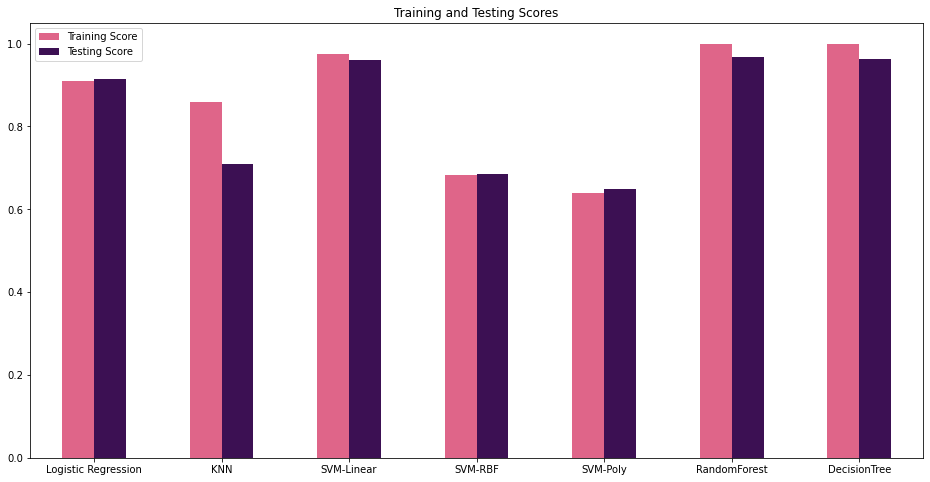

In [73]:
trainScores = [regressionModel.score(x_train, y_train), KNNModel.score(x_train, y_train), svmLinearModel.score(x_train, y_train), svmRbfModel.score(x_train, y_train),svmPolyModel.score(x_train, y_train), randomFModel.score(x_train,y_train), dTreeModel.score(x_train,y_train)]
testScores = [regressionModel.score(x_test, y_test), KNNModel.score(x_test, y_test), svmLinearModel.score(x_test, y_test), svmRbfModel.score(x_test, y_test),svmPolyModel.score(x_test, y_test), randomFModel.score(x_test,y_test), dTreeModel.score(x_test,y_test)]
indices = ['Logistic Regression', 'KNN', 'SVM-Linear', 'SVM-RBF','SVM-Poly', 'RandomForest', 'DecisionTree']
scores = pd.DataFrame({'Training Score': trainScores,'Testing Score': testScores}, index=indices)
plot = scores.plot.bar(figsize=(16, 8), rot=0, color=['#df6589ff', '#3c1053ff'])
plt.title('Training and Testing Scores')
plt.show()

In [74]:
predRegression = regressionModel.predict(x_test)
predSVMLinear = svmLinearModel.predict(x_test)
predSVMRbf = svmRbfModel.predict(x_test)
predKNN = KNNModel.predict(x_test)
predSVMPoly = svmPolyModel.predict(x_test)
predRandomF = randomFModel.predict(x_test)
predDTree = dTreeModel.predict(x_test)
predVals = pd.DataFrame(data={'truth': y_test, 'regression': predRegression, 'knn': predKNN, 'svm-linear': predSVMLinear, 'svm-rbf': predSVMRbf, 'svm-poly': predSVMPoly, 'random-forest': predRandomF, 'decision-tree': predDTree})

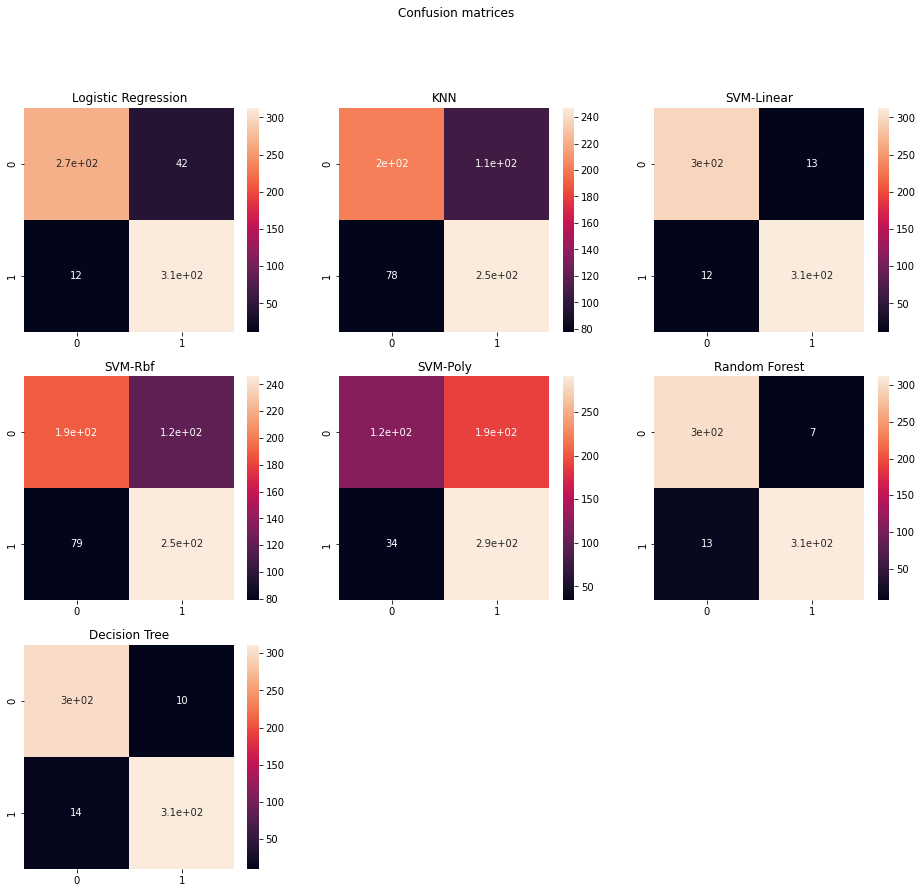

In [75]:
plt.figure(figsize=(16, 14))
plt.subplot(3, 3, 1)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, predRegression), annot=True).set(title='Logistic Regression')
plt.subplot(3, 3, 2)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, predKNN), annot=True).set(title='KNN')
plt.subplot(3, 3, 3)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, predSVMLinear), annot=True).set(title='SVM-Linear')
plt.subplot(3, 3, 4)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, predSVMRbf), annot=True).set(title='SVM-Rbf')
plt.subplot(3, 3, 5)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, predSVMPoly), annot=True).set(title='SVM-Poly')
plt.subplot(3, 3, 6)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, predRandomF), annot=True).set(title='Random Forest')
plt.subplot(3, 3, 7)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, predDTree), annot=True).set(title='Decision Tree')
plt.suptitle('Confusion matrices')
plt.show()
